In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# The DataOperations class is used to read in data, process data, and visualize data
class DataOperations:
   
    def __init__(self,atr=None):
        '''
        The __init__ method is the constructor for a class. 
        
        :param atr: The attribute to be tested
        '''
        self.atr = atr

    def Process(self):
        '''
        The Process function takes in a file path, a pandas dataframe, or a numpy array and returns a
        pandas dataframe
        :return: A pandas dataframe
        '''
       
        if isinstance(self.atr,np.ndarray):
            self.df = pd.DataFrame(self.atr)
            return self.df

        elif isinstance(self.atr,str):
            name, ext = os.path.splitext(self.atr)
            if ext == ".csv":
                self.df = pd.read_csv(self.atr)
                return self.df
            elif ext == ".json":
                self.df = pd.read_json(self.atr) 
                return self.df 
            else:
                raise ValueError("Invalid file type")  

        elif isinstance(self.atr,pd.DataFrame):
            self.df = self.atr
            return self.df

        elif type(self.atr==type(None)):
            new_rnd_data = {"a":np.random.randn(10),
                            "b":np.random.randn(10),
                            "c":np.random.randn(10)}

            self.df = pd.DataFrame(new_rnd_data,columns=new_rnd_data.keys())
            return self.df 

    def descriptive_statistics(self):
        '''
        The function prints the dataframe info and then the dataframe description
        '''
        
        print(self.df.info())
        print("*************************")
        print(self.df.describe().T)
         
    def visualization(self):
        '''
        This function is used to visualize the data
        '''

        for col in self.df.columns:
            if self.df[col].dtypes != "O":
                fig,ax = plt.subplots(figsize=(12,6))
                ax.hist(self.df[col],facecolor="g", alpha=0.75)
                plt.xlabel(f" {col}")
                plt.ylabel("Count")
                plt.title(f"Histogram of {col}")
                plt.grid(True)
                plt.show()

### With numpy.array

In [3]:
op_1 = DataOperations(np.random.randn(10))
op_1.Process()

,0
0,-1.744398
1,-0.451107
2,0.561340
3,0.154773
4,1.537788
5,0.318117
6,0.835128
7,-0.656752
8,-0.310229
9,0.346585


In [4]:
op_1.descriptive_statistics()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10 non-null     float64
dtypes: float64(1)
memory usage: 208.0 bytes
None
*************************
   count      mean       std       min       25%       50%       75%       max
0   10.0  0.059125  0.904411 -1.744398 -0.415888  0.236445  0.507651  1.537788


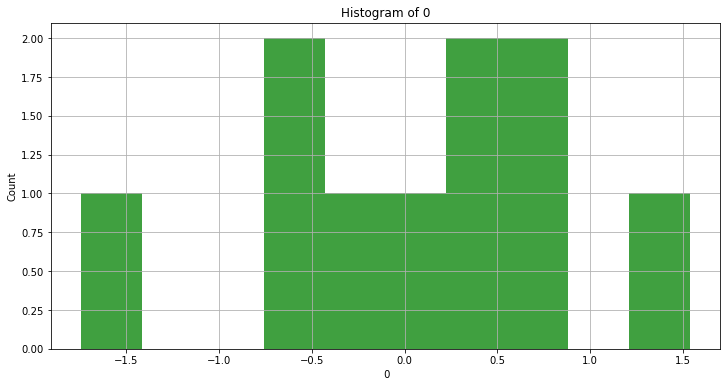

In [5]:
op_1.visualization()

### With path

In [6]:
op_2 = DataOperations("C:/Users/emirh/OneDrive/Belgeler/trial_dataset.csv")
op_2.Process()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
op_2.descriptive_statistics()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
*************************
              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5


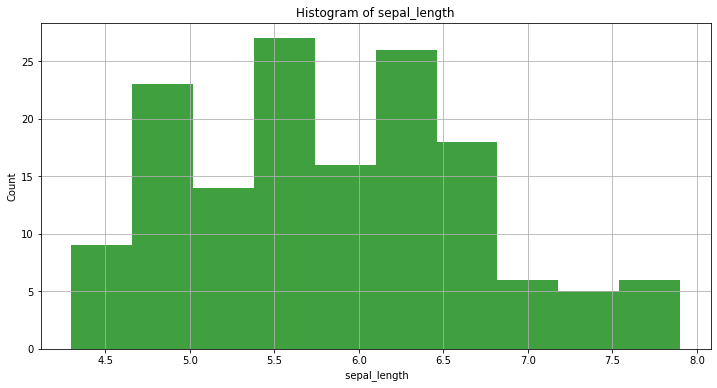

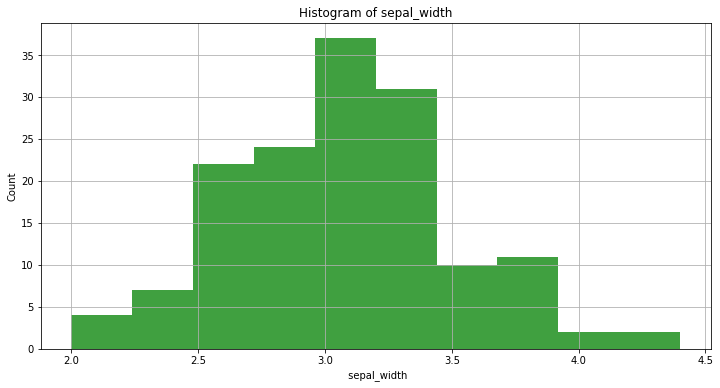

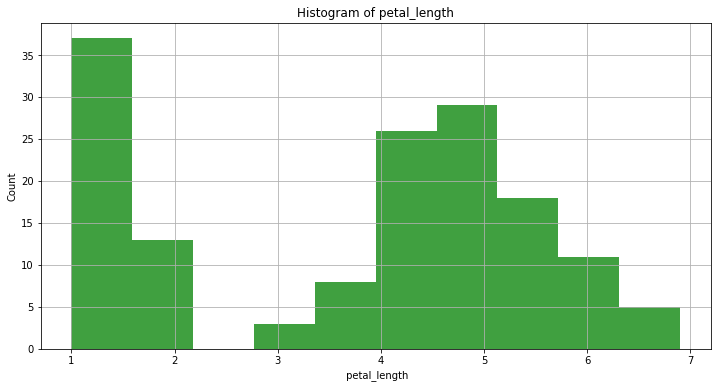

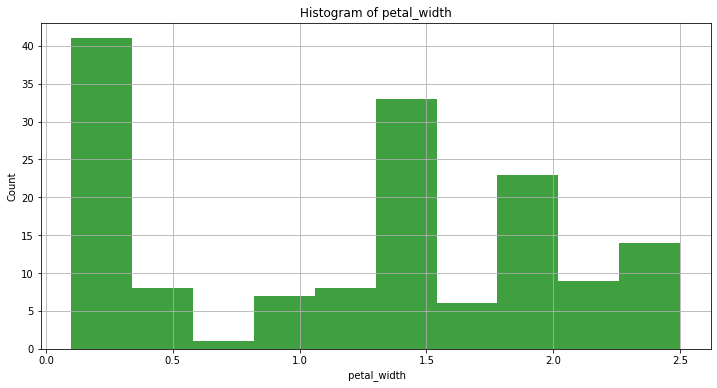

In [8]:
op_2.visualization()

### With Dataframe

In [9]:
df_1 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])

In [10]:
op_3 = DataOperations(df_1)
op_3.Process()

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [11]:
op_3.descriptive_statistics()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      int32
 1   b       3 non-null      int32
 2   c       3 non-null      int32
dtypes: int32(3)
memory usage: 164.0 bytes
None
*************************
   count  mean  std  min  25%  50%  75%  max
a    3.0   4.0  3.0  1.0  2.5  4.0  5.5  7.0
b    3.0   5.0  3.0  2.0  3.5  5.0  6.5  8.0
c    3.0   6.0  3.0  3.0  4.5  6.0  7.5  9.0


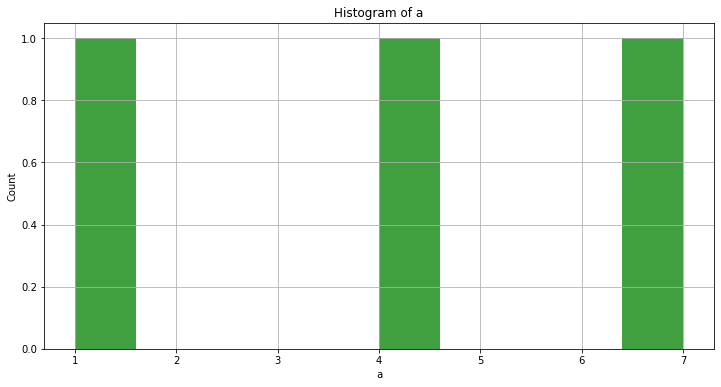

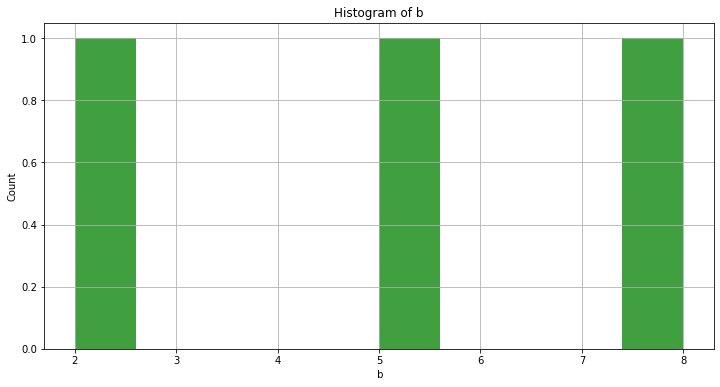

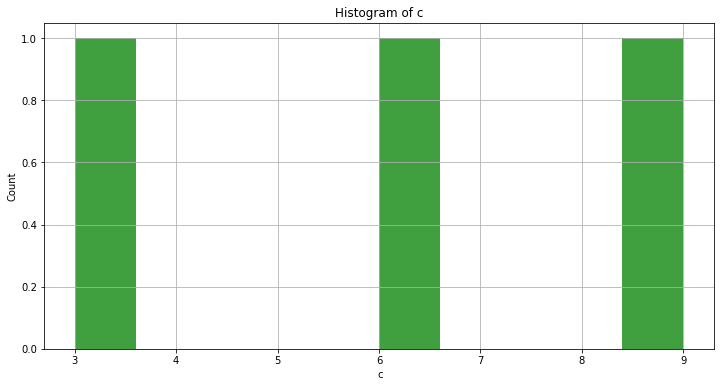

In [12]:
op_3.visualization()

### With (Not given)

In [13]:
op_4 = DataOperations()
op_4.Process()

,a,b,c
0,0.258301,-1.063553,0.427807
1,-1.004331,1.574996,-1.759366
2,0.203268,-0.969375,0.557655
3,-1.279653,0.369078,0.051358
4,2.024154,1.252821,-0.306112
5,0.679483,-0.398046,0.872662
6,0.032148,-1.087900,1.930440
7,0.369261,-0.721888,-0.860041
8,-0.955669,1.321837,-1.330991
9,0.817460,1.920887,1.317619


In [14]:
op_4.descriptive_statistics()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10 non-null     float64
 1   b       10 non-null     float64
 2   c       10 non-null     float64
dtypes: float64(3)
memory usage: 368.0 bytes
None
*************************
   count      mean       std       min       25%       50%       75%       max
a   10.0  0.114442  0.994490 -1.279653 -0.708715  0.230785  0.601927  2.024154
b   10.0  0.219886  1.205261 -1.087900 -0.907503 -0.014484  1.304583  1.920887
c   10.0  0.090103  1.170944 -1.759366 -0.721559  0.239582  0.793910  1.930440


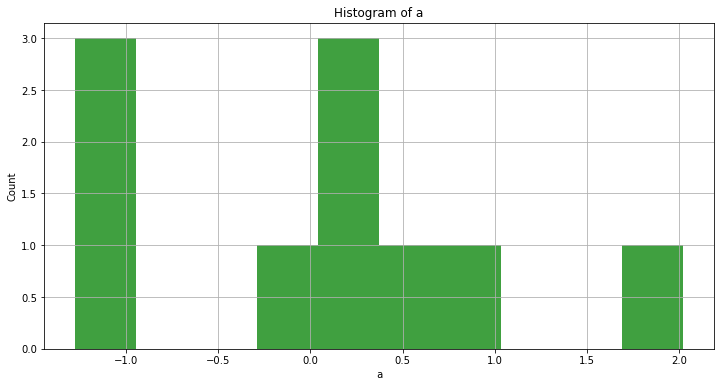

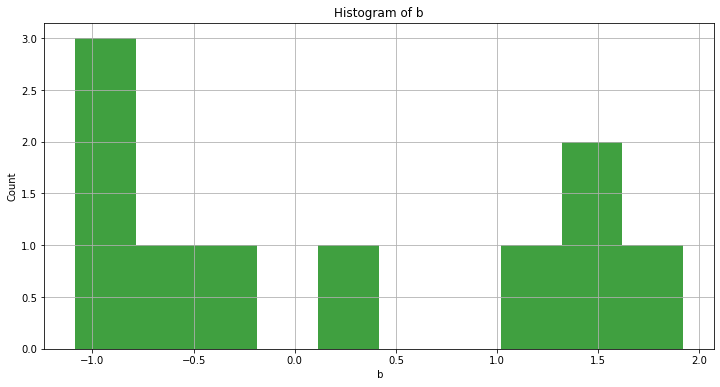

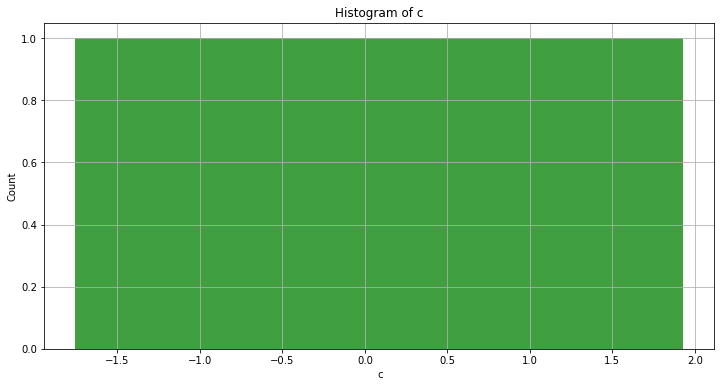

In [15]:
op_4.visualization()